In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
pd.options.display.max_rows = 360
Y = pd.read_csv('C:\\python27\\CAPSTONE\\Y.csv').sort_values('Condition')
listaml = Y.index[:43]
listnorm = Y.index[43:]

In [13]:
listaml = Y.index[:43]
listnorm = Y.index[43:]

COLLINEARITY CHECK FOR LOG REG

In [9]:
from collections import defaultdict
from sklearn.preprocessing import MinMaxScaler

def get_csv(ptnum,tube):
    fcs = 'C:\\python27\\FCSlog10\\' + str(8*(ptnum-1)+tube) + '.csv'
    return np.genfromtxt(fcs, delimiter=',')[1:,1:].astype(int)

def histo(data):
    d = defaultdict(int) 
    for cell in data:
        d[tuple(cell)] += 1
    return d

def scale_data(data):
    scale = MinMaxScaler()
    #scale = MaxAbsScaler()
    data = scale.fit_transform(data)
    data = data[:,data.sum(axis=0)!=0] # drop 100% empty columns
    return data

def get_data2(tube):
    #start = time.time()
    data = get_csv(1,tube)
    raw = pd.DataFrame(histo(data),index=[0])
        
    for pt in range(2,360):
        data = get_csv(pt,tube)
        raw.ix[pt-1,:] = histo(data)
    
    raw = scale_data(raw.fillna(0))

    #print('Raws scaled - ' + str((time.time()-start)/60) + ' min')
    return raw

np.corrcoef(get_data2(4))

array([[ 1.        , -0.0923163 , -0.13260092, ..., -0.06127286,
        -0.11903286, -0.08802539],
       [-0.0923163 ,  1.        , -0.0226436 , ...,  0.0493659 ,
         0.08799145,  0.09996856],
       [-0.13260092, -0.0226436 ,  1.        , ...,  0.00814773,
         0.15317661,  0.04309231],
       ..., 
       [-0.06127286,  0.0493659 ,  0.00814773, ...,  1.        ,
         0.01311654,  0.00910144],
       [-0.11903286,  0.08799145,  0.15317661, ...,  0.01311654,
         1.        ,  0.11056967],
       [-0.08802539,  0.09996856,  0.04309231, ...,  0.00910144,
         0.11056967,  1.        ]])

Global max

In [26]:
maxsig = np.zeros(57)

for i in range(1,360):
    temp = pd.read_csv('C:\\python27\\FCS2\\'+str(i)+'.csv')
    #temp = temp.drop(temp.columns[[0,3,4,6,7,8,9,10,11,12,15,16,19,22,23,26,29,30,36,37,40,43,44,47,50,51,52,53,54,55,56]],axis=1)
    for j in range(0,len(temp.columns)):
        if temp[temp.columns[j]].max() > maxsig[j]:
            maxsig[j] = temp[temp.columns[j]].max() 
            
maxsig

array([ 6999.     ,   204.6    ,  1014.83093,  1014.83093,   970.20264,
        1005.744  ,  1005.744  ,  1014.83093,   204.6    ,  1014.83093,
        1014.83093,  1014.83093,   978.96844,   911.0007 ,   952.90576,
         204.6    ,  1014.83093,  1014.83093,   944.3733 ,   987.8135 ,
         894.7593 ,   902.84344,   204.6    ,  1014.83093,  1014.83093,
        1014.83093,   996.73846,   996.73846,  1014.83093,   204.6    ,
        1014.83093,  1005.744  ,   970.20264,  1005.744  ,   911.0007 ,
        1005.744  ,   204.6    ,  1014.83093,  1014.83093,   978.96844,
         996.73846,  1005.744  ,  1005.744  ,   204.6    ,  1014.83093,
        1014.83093,   832.63794,  1005.744  ,   996.73846,   987.8135 ,
         204.6    ,  1014.83093,  1005.744  ,   894.7593 ,  1014.83093,
         927.5369 ,   952.90576])

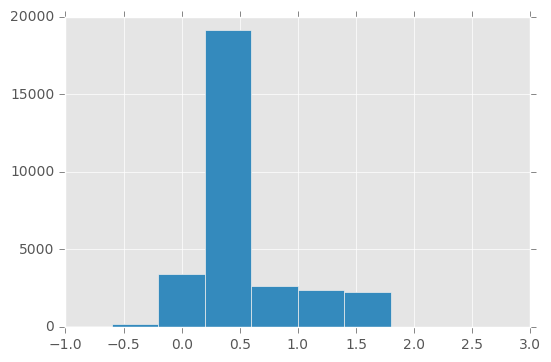

In [11]:
pt = 9
tube = 1

data = np.genfromtxt('C:\\python27\\FCS\\' + str((pt-1)*8+tube) + '.csv',delimiter=',')[1:,4]
#data2 = np.genfromtxt('C:\\python27\\FCS\\' + str((pt-1)*8+tube) + '.csv',delimiter=',')[1:,1]
data = np.log10(data)
#data2 = np.log10(data2)
plt.style.use('ggplot')
plt.plot(1,6)
plt.hist(data,range = [-1,3], bins =10)
plt.show()

In [11]:
histo

(array([ 805,  722, 2203, 4840, 2018, 1600, 3448, 4609, 4088, 5666], dtype=int64),
 array([  30.  ,   47.46,   64.92,   82.38,   99.84,  117.3 ,  134.76,
         152.22,  169.68,  187.14,  204.6 ]))

# LOG TRANSFORM, INTO BINS (10)

In [132]:
def get_binFSC(x):
    return int(x / 205 * 10)

def get_binOther(x):
    return int((np.log10(x)+1) / (3.00645+1) * 10)

def binmap(df):
    for i in range(7):
        if i == 0:
            df.ix[:,i] = df.ix[:,[i]].applymap(get_binFSC)
        else: 
            df.ix[:,i] = df.ix[:,[i]].applymap(get_binOther)

In [133]:
for i in range(1,2873): 
    temp = pd.read_csv('C:\\python27\\FCS\\'+str(i)+'.csv')
    binmap(temp)
    topath = 'C:\\python27\\FCSlog10\\'+str(i)+'.csv'
    temp.to_csv(topath)

# LOG TRANSFORM, INTO BINS (20)

In [116]:
def get_binFSC(x):
    return int(x / 205 * 20)

def get_binOther(x):
    return int((np.log10(x)+1) / (3.00645+1) * 20)

def binmap(df):
    for i in range(7):
        if i == 0:
            df.ix[:,i] = df.ix[:,[i]].applymap(get_binFSC)
        else: 
            df.ix[:,i] = df.ix[:,[i]].applymap(get_binOther)

In [115]:
for i in range(1,2873): 
    temp = pd.read_csv('C:\\python27\\FCS\\'+str(i)+'.csv')
    binmap(temp)
    topath = 'C:\\python27\\FCSlog20\\'+str(i)+'.csv'
    temp.to_csv(topath)

# TURN ALL DATA INTO BINS (100)

In [6]:
def get_binFSC(x):
    return int((float(x) / float(205)) * 200)

def get_binOther(x):
    return int((float(x) / float(1015)) * 200)

def binmap(df):
    for i in range(len(df.columns)):
        if i%7 == 0:
            df.ix[:,[i]] = df.ix[:,[i]].applymap(get_binFSC)
        else: 
            df.ix[:,[i]] = df.ix[:,[i]].applymap(get_binOther)

In [7]:
for i in range(1,2873): 
    temp = pd.read_csv('C:\\python27\\FCS\\'+str(i)+'.csv')
    binmap(temp)
    topath = 'C:\\python27\\FCS200\\'+str(i)+'.csv'
    temp.to_csv(topath)

# TURN ALL DATA INTO BINS (50)

In [17]:
def get_binFSC(x):
    return int((float(x) / float(205)) * 50)

def get_binOther(x):
    return int((float(x) / float(1015)) * 50)

def binmap(df):
    for i in range(len(df.columns)):
        if i%7 == 0:
            df.ix[:,[i]] = df.ix[:,[i]].applymap(get_binFSC)
        else: 
            df.ix[:,[i]] = df.ix[:,[i]].applymap(get_binOther)

In [18]:
for i in range(1,360): 
    temp = pd.read_csv('C:\\python27\\FCS2\\'+str(i)+'.csv').ix[:,1:]
    binmap(temp)
    topath = 'C:\\python27\\FCS50\\'+str(i)+'.csv'
    temp.to_csv(topath)

# TURN ALL DATA INTO BINS (10)

In [28]:
def get_binFSC(x):
    return int((float(x) / float(205)) * 10)

def get_binOther(x):
    return int((float(x) / float(1015)) * 10)

def binmap(df):
    for i in range(len(df.columns)):
        if i%7 == 0:
            df.ix[:,[i]] = df.ix[:,[i]].applymap(get_binFSC)
        else: 
            df.ix[:,[i]] = df.ix[:,[i]].applymap(get_binOther)

In [31]:
for i in range(1,360): 
    temp = pd.read_csv('C:\\python27\\FCS2\\'+str(i)+'.csv').ix[:,1:]
    binmap(temp)
    topath = 'C:\\python27\\FCS3\\'+str(i)+'.csv'
    temp.to_csv(topath)
    

# COMBINE 8 TUBES FOR EACH PATIENT SIDE BY SIDE

In [2]:
n = 7000

for i in range(1,2873):    
    if i%8 == 1: # first tube
        temp = pd.read_csv('C:\\python27\\FCS\\'+str(i)+'.csv').ix[:6999,2:]
        
    elif i%8 > 1: # concat the next tube. for i = 7, concat tube 8.
        temp = pd.concat([temp,pd.read_csv('C:\\python27\\FCS\\'+str(i)+'.csv').ix[:6999,2:]],axis=1)
        
    elif i%8 == 0: # tube 8 for every patient: write the set of 8 into a new csv named for patient number
        temp = pd.concat([temp,pd.read_csv('C:\\python27\\FCS\\'+str(i)+'.csv').ix[:6999,2:]],axis=1)
        topath = 'C:\\python27\\FCS3\\'+str(i/8)+'.csv'
        temp.to_csv(topath)      

# DROP REDUNDANT, IRRELEVANT MARKERS

In [ ]:
for i in range(1,360):
    path = 'C:\\python27\\FCS2\\' + str(i) + '.csv'
    topath = 'C:\\python27\\FCSback\\' + str(i) + '.csv'

# BACKFILL WITH MEANS

In [7]:
for i in range(1,360):
    path = 'C:\\python27\\FCS2\\' + str(i) + '.csv'
    topath = 'C:\\python27\\FCSback\\' + str(i) + '.csv'
    
    temp = pd.read_csv(path)
    temp = temp.drop(temp.columns[0],axis=1)
    for j in range(0,36):
        temp.ix[:,j] = temp.ix[:,j].fillna(temp.ix[:,j].mean())
    temp.to_csv(topath)
temp.head()

# TAKE FIRST N SAMPLES, STACK N SAMPLES INTO "N * 7 : 1" COLUMN

In [36]:
for i in range(1,2873):
    path = 'C:\\python27\\FCS\\' + str(i) + '.csv'
    topath = 'C:\\python27\\FCSlist\\' + str(i) + '.csv'
    
    temp = pd.read_csv('C:\\python27\\FCS\\1.csv')
    df = temp.iloc[:5000,0]
    for j in range(1,len(temp.columns)):
        df = pd.concat([df,temp.iloc[:5000,j]],ignore_index=True)
    df.to_csv(topath)

# CONCAT 8 TUBES INTO 1 PER PT

In [38]:
for i in range(1,2873):    
    if i%8 == 1: # first case: concatenate tube 1 and 2
        doc = pd.read_csv('C:\\python27\\FCSlist\\' + str(i) + '.csv')
        doc2 = pd.read_csv('C:\\python27\\FCSlist\\' + str(i+1) + '.csv')
        doc = pd.concat([doc,doc2],axis = 0)
    elif i%8 == 0: # tube 8 for every patient: write the set of 8 into a new csv named for patient number
        path = 'C:\\python27\\FCSflat\\' + str(i/8) + '.csv'
        doc.to_csv(path)
    elif i%8 != 0: # concat the next tube. for i = 7, concat tube 8.
        doc = pd.concat([doc,pd.read_csv('C:\\python27\\FCSlist\\' + str(i+1) + '.csv')],axis=0)